## Student Info

* Student name 1: Phan Tấn Kiệt
* Student ID 1: 20120313

(Xin phép thầy cho em thực hiện bài tập này cá nhân, vì các bạn mà em biết và liên lạc được trong lớp đều đã có nhóm)

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE
    df = pd.read_csv(file_path, sep='\t')

    attributes = df.columns.values[:-1]
    X_train = df.iloc[:, :-1].values
    y_train = df.iloc[:, -1].values
    if split:
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=520)
        return X_train, y_train, X_test, y_test, attributes
    else:
        return X_train, y_train, attributes
    raise NotImplementedError()

In [3]:
# 4
# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 
    
class DecisionTree:
    def __init__(self, attr):
        # YOUR CODE HERE
        self.tree = {}
        self.depth = 0
        self.attributes = attr
        #raise NotImplementedError()

    def fit(self, X_train, y_train, node = {}, depth = 0):
        # 3
        # YOUR CODE HERE
        if all(y_train == y_train[0]):
            return {"val": y_train[0]}
        else:
            attr_idx, cutoff, entropy = self.best_split_of_all(X_train, y_train)
            y_left = y_train[X_train[:, attr_idx] < cutoff]
            y_right = y_train[X_train[:, attr_idx] >= cutoff]
            if(len(y_left) == 0 or len(y_right) == 0):
                return {"val": y_train[0]}
            node["attr_idx"] = attr_idx
            node["cutoff"] = cutoff
            label_dict = {'yes': 1, 'no': 0}
            y_train_int = np.array([label_dict[label] for label in y_train])
            node["val"] = str(list(label_dict.keys())[np.argmax(np.bincount(y_train_int))])
            node["left"] = self.fit(X_train[X_train[:, attr_idx] < cutoff, :], y_left, dict(), depth + 1)
            node["right"] = self.fit(X_train[X_train[:, attr_idx] >= cutoff, :], y_right, dict(), depth + 1)
            self.depth += 1
            self.tree = node
            return node
        #raise NotImplementedError()

    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        tree = self.tree
        pred = []
        for i in range(len(X_test)):
            pred.append(self._predict(X_test[i], tree))
        return pred
        #raise NotImplementedError()

    def visualize(self):
        # 0.5
        # YOUR CODE HERE
        tf = {'yes': 'TRUE', 'no': 'FALSE'}
        def print_tree(node, indent):
            if "cutoff" not in node:
                print(indent + "---" + node["val"])
            else:
                print(indent +self.attributes[node["attr_idx"]] + " = " + str(node["cutoff"] + " : " + tf[node["val"]]))
                print_tree(node["left"], indent + "|")
                print_tree(node["right"], indent + "|")
        print_tree(self.tree, "")
        #raise NotImplementedError()
        
    # utility methods
    def entropy(self, division):
        n_samples = len(division)
        n_classes = set(division)
        count = []
        for s in n_classes:
            temp_count = 0
            for i in range(n_samples):
                if division[i] == s:
                    temp_count += 1
            count.append(temp_count)
            
        prob = np.array(count) / n_samples
        e = -np.sum(prob * np.log2(prob))
        return e, n_samples
    def get_entropy(self, y_predict, y):
        n = len(y)
        entropy_true, n_true = self.entropy([y[i] for i in range(n) if y_predict[i]])
        entropy_false, n_false = self.entropy([y[i] for i in range(n) if not y_predict[i]])
        s = n_true * entropy_true / n + n_false * entropy_false / n
        return s
    def best_split_of_all(self, X, y):
        attr_idx, cutoff = None, None
        min_entropy = 1
        for i in range(X.shape[1]):
            entropy, cur_cutoff = self.best_split(X[:, i], y)
            if entropy == 0:
                return i, cur_cutoff, entropy
            if entropy <= min_entropy:
                min_entropy = entropy
                attr_idx = i
                cutoff = cur_cutoff
        return attr_idx, cutoff, min_entropy
    def best_split(self, col_data, y):
        min_entropy = 10
        cutoff = None
        for value in np.unique(col_data):
            y_predict = col_data < value
            my_entropy = self.get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    def _predict(self, row, cur_layer):
        if "cutoff" not in cur_layer:
            return cur_layer["val"]
        else:
            if row[cur_layer["attr_idx"]] < cur_layer["cutoff"]:
                return self._predict(row, cur_layer["left"])
            else:
                return self._predict(row, cur_layer["right"])

In [4]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

X_train, y_train, X_test, y_test, attributes = load_data("data/tennis.txt")
tree = DecisionTree(attributes)

tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
print("Accuracy for train set: ", acc_train)

y_hat_test = tree.predict(X_test) 

acc_test = accuracy_score(y_test, y_hat_test)
print("Accuracy for test set: ", acc_test)

print("\nVisualize: ")
tree.visualize()


Accuracy for train set:  1.0
Accuracy for test set:  0.3333333333333333

Visualize: 
outlook = sunny : FALSE
|wind = weak : FALSE
||outlook = rain : TRUE
|||---yes
|||---no
||---yes
|---no


In [5]:
X_train, y_train, X_test, y_test, attributes = load_data("data/titanic2.txt")
tree = DecisionTree(attributes)

tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 

acc_train = accuracy_score(y_train, y_hat_train)
print("Accuracy for train set: ", acc_train)

y_hat_test = tree.predict(X_test) 

acc_test = accuracy_score(y_test, y_hat_test)
print("Accuracy for test set: ", acc_test)

print("\nVisualize: ")
tree.visualize()


Accuracy for train set:  0.7613636363636364
Accuracy for test set:  0.7482993197278912

Visualize: 
sex = male : TRUE
|pclass = 3rd : FALSE
||pclass = 2nd : FALSE
|||---yes
|||age = child : FALSE
||||---no
||||---yes
||pclass = crew : FALSE
|||age = child : TRUE
||||---no
||||---yes
|||---yes
|pclass = 2nd : TRUE
||age = child : TRUE
|||---no
|||---yes
||age = child : TRUE
|||pclass = 3rd : TRUE
||||---no
||||pclass = crew : TRUE
|||||---no
|||||---no
|||pclass = 3rd : TRUE
||||---yes
||||---no


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*  
Độ chính xác là 0,761 với tập huấn luyện và 0,748 cho với tập thử nghiệm rất gần nhau. Mô hình overfitting với tập huấn luyện. Và độ chính xác của mô hình chưa cao. Có thể là do mô hình chưa đủ phức tạp. Chúng ta có thể tăng kích thước của tập huấn luyện, thu thập nhiều dữ liệu hơn.

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [7]:
seed = 520 # for reproducibility

In [8]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

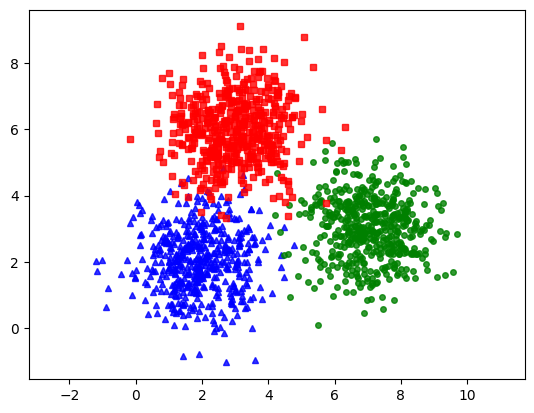

In [9]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [10]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    # YOUR CODE HERE
    centers_idx = np.random.choice(X.shape[0], size=k, replace=False)
    centers = X[centers_idx]
    return centers
    raise NotImplementedError()

In [11]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [12]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    distances = cdist(X, centers)
    labels = np.argmin(distances, axis=1)
    return labels
    raise NotImplementedError()

In [13]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [14]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        mask = np.zeros(labels.shape, dtype=bool)
        for i in range(labels.shape[0]):
            if labels[i] == k:
                mask[i] = True
        cluster_points = X[mask]
        if len(cluster_points) > 0:
            centers[k] = cluster_points.mean(axis=0)
        #raise NotImplementedError()
    return centers

In [15]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    
    # YOUR CODE HERE
    return np.allclose(centers, new_centers)
    raise NotImplementedError()

In [16]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
        #raise NotImplementedError()
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


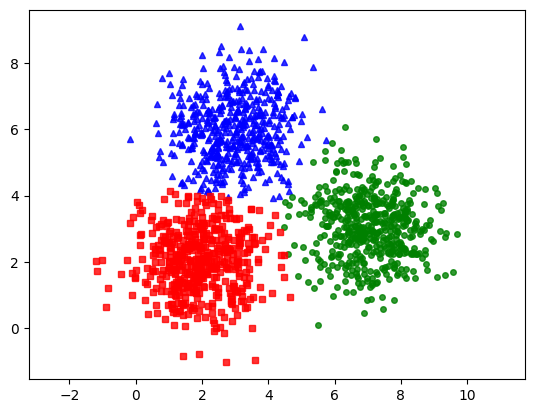

In [17]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*  
Các điểm center ban đầu là [2, 2], [7, 3], [3, 6]. Sau khi chạy thuật toán K-means, điểm center có giá trị là [2.96, 6.01], [7.03, 3.05] và [1.92, 2.03]. Điều này có nghĩa là thuật toán K-means có thể xác định chính xác các điểm center của các cụm.

**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)

- Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*  
Nhược điểm của thuật toán K-means có thể bao gồm những điều sau:  
- Lựa chọn các điểm center có thể là một nhược điểm nếu dữ liệu không được phân cụm tốt hoặc nếu số lượng cụm không được biết trước.
- Tốn kém trong việc tính toán. Thuật toán K-means có thể gây tốn kém chi phí, đặc biệt đối đối với các tập dữ liệu lớn.
- Không phù hợp với tất cả các loại dữ liệu. K-means phù hợp nhất cho dữ liệu có dạng hình cầu. Nếu dữ liệu không phải là hình cầu, thuật toán có thể không hoạt động tốt.
- Nếu có các điểm ngoại lệ trong dữ liệu, chúng có thể bị gán sai cụm.

Cách giải quyết cho những nhược điểm trên:
- Chạy thuật toán K-means nhiều lần với các điểm center khác nhau và lựa chọn giải phát tốt nhất.
- Giảm chiều dữ liệu.
- Sử dụng các thuật toán phân cụm khác.
- Sử dụng thuật toán phân cụm được thiết kế đặc biệt để xử lý các giá trị ngoại lệ, chẳng hạn như thuật toán k-median.